# Лекция 2. Введение в статистику.

In [2]:
from scipy.stats import (
    binom
)
import numpy as numpy
from seaborn import distplot
from matplotlib import pyplot
import seaborn
import random
from tqdm.notebook import tqdm

import sys
sys.path.append('.')

In [3]:
def inverse_plot_colorscheme():
    import cycler
    def invert(color_to_convert): 
        table = str.maketrans('0123456789abcdef', 'fedcba9876543210')
        return '#' + color_to_convert[1:].lower().translate(table).upper()
    update_dict = {}
    for key, value in pyplot.rcParams.items():
        if value == 'black':
            update_dict[key] = 'white'
        elif value == 'white':
            update_dict[key] = 'black'
    
    old_cycle = pyplot.rcParams['axes.prop_cycle']
    new_cycle = []
    for value in old_cycle:
        new_cycle.append({
            'color': invert(value['color'])
        })
    pyplot.rcParams.update(update_dict)
    pyplot.rcParams['axes.prop_cycle'] = cycler.Cycler(new_cycle)
    lec = pyplot.rcParams['legend.edgecolor']
    lec = str(1 - float(lec))
    pyplot.rcParams['legend.edgecolor'] = lec

In [4]:
inverse_plot_colorscheme()

______



## Часть 1. Статистическая мощность

### Ошибка False Negative

На прошлом занятии при построении критериев мы обращали внимание только на $\alpha$, уровень значимости критерия. Но этот параметр контролирует лишь ошибку False Positive, а именно вероятность, что критерий выдаст 1 (примет $\mathsf{H}_1$ и отвергнет $\mathsf{H}_0$), когда правильный ответ &mdash; 0 (верна $\mathsf{H}_0$).

Уже в части 2 на прошлом уроке было введено понятие ошибки False Negative, а именно выдача 0, когда верный ответ &mdash; 1.

Случай, когда вероятность FPR $< \alpha$, но при этом вероятность False Negative (False Negative Rate, FNR) огромна, можно привести легко. Для этого достаточно **никогда** не отвергать гипотезу, взяв критерий $S \equiv 0$.

Приведём пример, когда ошибки False Negative происходят не всегда, но критерии являются всё ещё бесполезными.

### Критерии для времени года ☁️☀️❄️

Поставим гипотезу о том, что сейчас на улице лето. Для проверки можно было бы конечно посмотреть в календарь, но мы поступим иначе.

$$ \mathsf{H}_0: \text{ на улице лето} $$
$$ \mathsf{H}_1: \text{ на улице не лето} $$

Гипотеза очень полезная, ведь если она отвергается, а вы студент, необходимо ходить на пары Академии Аналитиков Авито и делать задания!

**Критерий Тимура**

Посмотрим в окно и определим, идёт ли там снег. Если он идёт, то это неплохое доказательство того, что сейчас не лето, а значит можно отвергнуть $\mathsf{H}_0$.

Посчитаем вероятность ошибки False Positive.

$$ FPR(S) = P(\text{идёт снег}\ |\ \text{сейчас лето}) < 0.001 $$

Мы знаем, что летом снег идёт очень редко (вероятность ошибки заведомо ниже $0.1\%$), так что это точно критерий уровня значимости $0.001$, чего обычно с лихвой достаточно для критериев.

Но что с ошибкой False Negative? Рассмотрим конкретный случай: сейчас сентябрь. 


$$ FNR(S) = P(\text{не идёт снег}\ |\ \text{сейчас сентябрь}) > 0.9 $$

Поскольку в сентябре почти всегда нет снега, можно сказать, что вероятность ошибки False Negative больше $90\%$, значит этот критерий на самом деле бесполезен. Действительно, если применять его для принятия решения о том, пойти ли на занятия, посещаемость составит всего 10 процентов, за чем последует отчисление...

**Тривиальный критерий**

Сформулируем другой критерий уровня значимости $\alpha$, причём в данном случае уровень значимости можно выбрать произвольным.

$$
S(\xi) = \begin{cases}
    1, \text{ если монетка с вероятностью орла } \alpha \text{ выпала орлом} \\
    0, \text{ иначе}
\end{cases}
$$

Получается, этот критерий случаен, и он не использует вообще никакой информации о погоде. Однако требованиям к уровню значимости он удовлетворяет.

$$ FPR = P(\text{выпал орёл}\ |\ \text{сейчас лето}) = P(\text{выпал орёл}) = \alpha $$

Вычислим вероятность ошибки False Negative.

$$ FNR = P(\text{не выпал орёл}\ |\ \text{сейчас не лето}) = P(\text{не выпал орёл}) = 1 - \alpha $$

При $\alpha = 0.001$, как у критерия Тимура, получаем вероятность ошибки False Negative $0.999 > 0.9$, то есть при одинаковом уровне значимости с критерием Тимура, тривиальный критерий чаще допускает ошибку False Negative.

### Мощность

В статистике принято положительным результатом считать отвержение нулевой гипотезы, потому что обычно подтверждение альтернативы означает наличие бизнес-результата. Поэтому считается хорошим критерий, который чаще позволяет выявить бизнес-результат. И считают тогда не вероятность ошибки False Negative, а *мощность*, которая равна вероятности отвергнуть нулевую гипотезу при верности $\mathsf{H}_1$, то есть True Positive Rate.

$$ \text{Power}_S = 1 - FNR $$

Когда альтернатива $\mathsf{H}_1$ состоит из множества исходов, мощность рассматривают как функцию от исхода. Например, можно посчитать мощность критерия Тимура и тривиального критерия зимой и осенью.

$$ \text{Power}_S(\mu) = 1 - FNR(\mu) $$

**Критерий Тимура**

$$ \text{Power}_S(\text{май}) = P(\text{идёт снег } | \text{ май}) \approx 0.00001 $$
$$ \text{Power}_S(\text{октябрь}) = P(\text{идёт снег } | \text{ октябрь}) \approx 0.1 $$
$$ \text{Power}_S(\text{январь}) = P(\text{идёт снег } | \text{ январь}) \approx 0.5 $$

**Тривиальный критерий**

$$ \text{Power}_S(\text{май}) = P(\text{выпал орёл } | \text{ май}) = \alpha = 0.001 $$
$$ \text{Power}_S(\text{октябрь}) = P(\text{выпал орёл } | \text{ октябрь}) = \alpha = 0.001 $$
$$ \text{Power}_S(\text{январь}) = P(\text{выпал орёл } | \text{ январь}) = \alpha = 0.001 $$

Обычно задача поиска лучшего критерия формулируется как поиск как можно более мощного критерия при заданном уровне значимости $FPR \leqslant \alpha$. Но мы сказали, что мощность &mdash; функция от параметра, в нашем случае от месяца.

Если мы будем применять критерий в январе, то мощнее критерий Тимура, а если в мае, то мощнее траивиальный критерий. Поэтому нужно понимать, когда будет применяться критерий, а значит мы ищем самый мощный критерий в интересующей нас области.

Хотя в реальности в мае мощность обоих критериев настолько низкая, что они просто бесполезны, и использовать их не имеет смысла.

## Часть 2. Мощность для задачи с доставкой

Применим новые знания о мощности для нашей задачи с доставкой. Из бизнес-соображений мы уже выбрали $\alpha = 0.05$, а значит знаем, что мы неправильно отвергаем гипотезу $\mathsf{H}_0:\ \mu = 0.5$ с вероятностью не более, чем $5\%$. То есть этим ограничена вероятность ошибки False Positive.

А с какой вероятностью мы будем *правильно* отвергать гипотезу? И какая у нас будет вероятность ошибки False Negative? На этот вопрос как раз ответит формула мощности.

Вспомним критерий, по которому мы принимаем решение:

$$ Q(\xi) = \sum\limits_{i=1}^n \xi_i - \text{количество успешных доставок} $$

$$ S = \{Q \geqslant 20\} $$

То есть если получаем хотя бы $20$ успешных доставок, то отвергаем $\mathsf{H}_0$.

Заметим, что, как и в прошлом пункте, мощность зависит от того, какое значение $\mu$ в нашей генеральной совокупности. Зафиксируем сначала параметр $\mu = 0.6$ и посчитаем мощность для него. Если истинный параметр такой, то статистика $Q$ имеет распределение $Binom(30, 0.6)$.

In [5]:
binom_h0 = binom(n=30, p=0.5)
binom_alternative = binom(n=30, p=0.6)

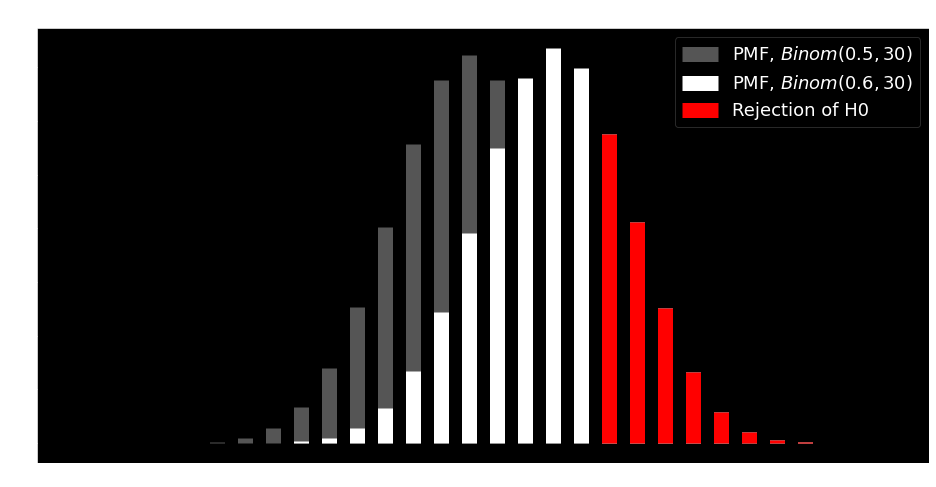

In [7]:
x_grid = numpy.arange(1, 31)
crit_reg = x_grid >= 20

pyplot.figure(figsize=(16, 8))

# строим распределение при H0 и критическую область
probs_h0 = binom_h0.pmf(x_grid)
pyplot.vlines(x_grid, 0, probs_h0, linewidth=15.0, color='#AAAAAA', label='PMF, $Binom(0.5, 30)$', alpha=0.5)

# строим распределение при mu > 0.5
probs_alternative = binom_alternative.pmf(x_grid)
pyplot.vlines(x_grid, 0, probs_alternative, linewidth=15.0, color='white', label='PMF, $Binom(0.6, 30)$')
pyplot.vlines(x_grid[crit_reg], 0, probs_alternative[crit_reg], linewidth=15.0, label='Rejection of H0', color='red')

pyplot.title('Binomial distribution', fontsize=20)
pyplot.legend(fontsize=18)
pyplot.show()

Как и раньше, нас интересует вероятность получить $20$ или более успехов. Но если раньше мы смотрели на неё для распределения с $\mu=0.5$ и хотели, чтобы она была меньше $5\%$, то теперь мы смотрим при $\mu = 0.6$ и стремимся сделать эту величину как можно больше. По сравнению с вычислением FPR формула не поменяется, изменяется только $\mu$

In [8]:
critical_value = 20
power = 1 - binom(n=30, p=0.6).cdf(critical_value - 1)
fpr   = 1 - binom(n=30, p=0.5).cdf(critical_value - 1)

print('False Positive Rate is {:.1%}'.format(fpr))
print('Power is {:.1%}'.format(power))

False Positive Rate is 4.9%
Power is 29.1%


Видно, что мощность около $30\%$. Это довольно маленькое значение, ведь если наш продукт прибылен, то мы увидим это с помощью нашего теста только с вероятностью в $30$ процентов. Мы легко можем пропустить эффект.

Что же можно сделать, чтобы сделать мощность выше? Чтобы разобраться, реализуем функцию мощности в общем виде.

In [9]:
def get_stat_power(N, mu_h0, mu_alternative, alpha):
    '''Вычисляет статистическую мощность критерия для биномиального распределения
    
    Параметры:
        N - количество бернуллиевских экспериментов (размер выборки)
        mu_h0 - вероятность успеха в нулевой гипотезе
        mu_alternative - предполагаемая вероятность успеха в эксперименте
        alpha - уровень значимости критерия
    '''
    binom_h0 = binom(n=N, p=mu_h0)
    binom_alternative = binom(n=N, p=mu_alternative)

    # вычисляем критическое значение
    critical_value = binom_h0.ppf(1 - alpha) + 1
    # вычисляем мощность по формуле
    return 1 - binom_alternative.cdf(critical_value - 1) 

In [10]:
get_stat_power(30, 0.5, 0.6, alpha=0.05)

0.29147186122349644

Когда в жизни мы наблюдаем какое-то явление и видим его всего несколько раз, мы не уверены в том, что оно не случайно. Если же видим его достаточно часто, то уже составляем закономерности. Так и в статистике. Когда мы посмотрели на 30 пробных доставок, мы замечаем, что доля доставок больше половины. Но мы всё ещё не уверены. Чтобы получить больше уверенности, нужно провести больше наблюдений, то есть найти больше пробных клиентов.

Посмотрим, что будет, если мы проведём эксперимент на 300 клиентах.

In [11]:
get_stat_power(300, 0.5, 0.6, alpha=0.05)

0.9655326717180854

Видим, что мощность уже очень близка к $100\%$. Но провести 300 пробных доставок гораздо затратнее, чем 30. И по ресурсам, и по времени. Поэтому обычно балансируют между мощностью и длительностью/затратами эксперимента.

Принято считать, что приемлемой для работы мощностью считается $80\%$. Посмотрим, как изменяется мощность при росте размера выборки, и сколько нужно провести экспериментов, чтобы детектировать эффект при $\mu = 0.6$ в $80\%$ случаев.

In [12]:
n_grid = numpy.arange(10, 600, 10)
# можем вычислить 
power = get_stat_power(n_grid, 0.5, 0.6, alpha=0.05)

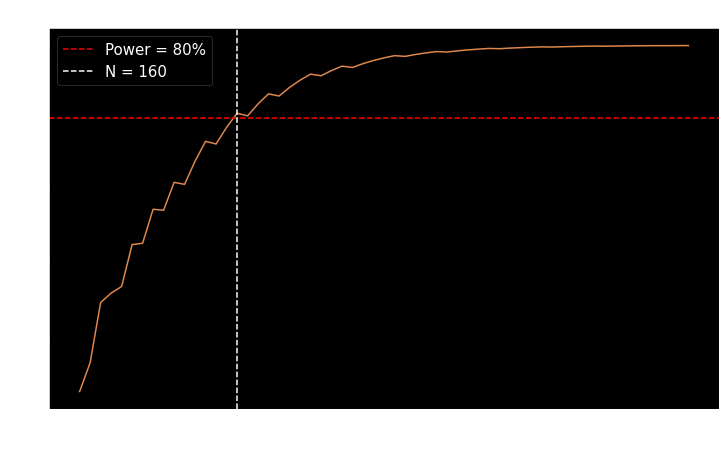

In [14]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $\mu = 0.6$', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(n_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80% 
min_n = n_grid[power >= 0.8].min()
pyplot.axvline(min_n, ls='--', color='white', label=f'N = {min_n}')

pyplot.legend(fontsize=15)
pyplot.show()

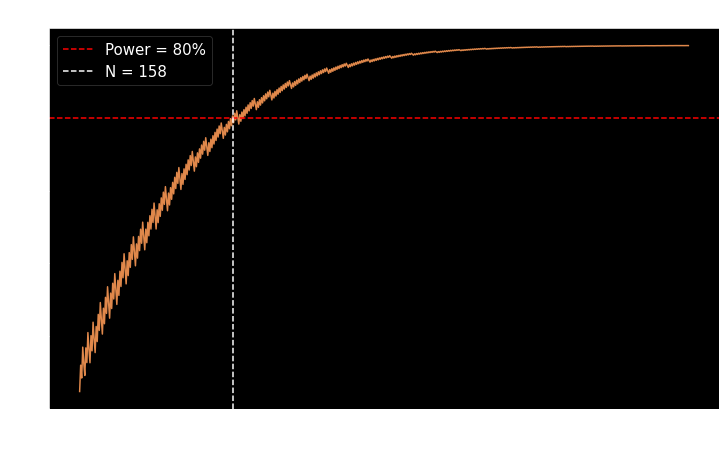

In [15]:
## что за эффект пилообразности при шаге 1 виден? От округления до целого числа
n_grid = numpy.arange(10, 600, 1)
# можем вычислить 
power = get_stat_power(n_grid, 0.5, 0.6, alpha=0.05)
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $\mu = 0.6$', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(n_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80% 
min_n = n_grid[power >= 0.8].min()
pyplot.axvline(min_n, ls='--', color='white', label=f'N = {min_n}')

pyplot.legend(fontsize=15)
pyplot.show()

Видим, что для мощности в $80\%$ достаточно набрать 160 доставок.

А что, если мы хотим детектировать ещё меньший эффект? Например, если хотим отвергать гипотезу при $\mu = 0.51$. Часто улучшение вероятности успеха на $1\%$ может быть значимым для продукта, поэтому этот вопрос не лишен смысла.

In [16]:
n_grid = numpy.arange(10, 30000, 59)
# можем вычислить 
power = get_stat_power(n_grid, 0.5, 0.51, alpha=0.05)

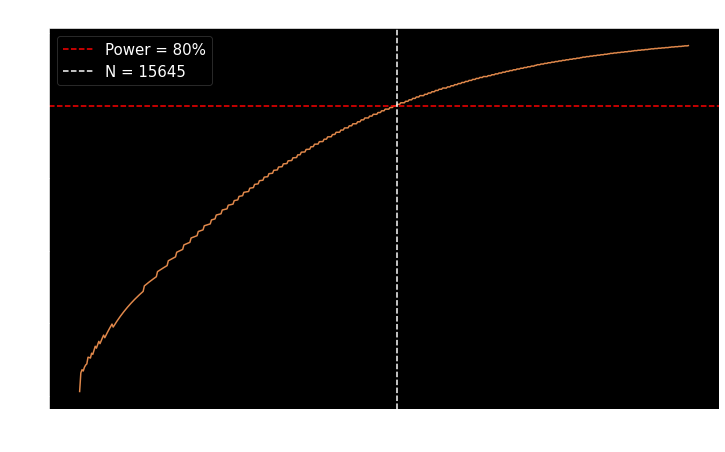

In [17]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $\mu = 0.51$', fontsize=18)
pyplot.xlabel('Number of trial deliveries', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(n_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')

# считаем минимальный размер выборки для мощности в 80% 
min_n = n_grid[power >= 0.8].min()
pyplot.axvline(min_n, ls='--', color='white', label=f'N = {min_n}')

pyplot.legend(fontsize=15)
pyplot.show()

Видим, что потребуется более 15 тысяч клиентов, чтобы детектировать такой эффект! Очень сложно найти столько пробных клиентов. Но нужно задаться вопросом, а стоит ли это делать? В нашем случае, если вероятность успеха $51\%$, то прибыль с заказов будет небольшая, и вложения инвесторов конечно будут окупаться, но очень долго. Поэтому увеличение на $1%$ для нашей задачи не значимо *практически*, а значит не нужно стараться набирать 15 тысяч людей, а можно остановиться и на 160.

Перед каждым экспериментом аналитику стоит задумываться над вопросом длительности теста и количества участников. Для этого нужно понять:

* какой эффект является для задачи практически значимым?
* сколько потребуется испытуемых, чтобы детектировать этот эффект чаще, чем в $80\%$ случаев? 

По графикам видно, что для детектирования меньшего эффекта нужен больший размер выборки. Посмотрим, как для фиксированного $N=30$ меняется мощность для разных параметров $\mu$.

In [20]:
mu_grid = numpy.linspace(0.5, 1, 500)
# можем вычислить сразу для всех mu
power = get_stat_power(30, 0.5, mu_grid, alpha=0.05)

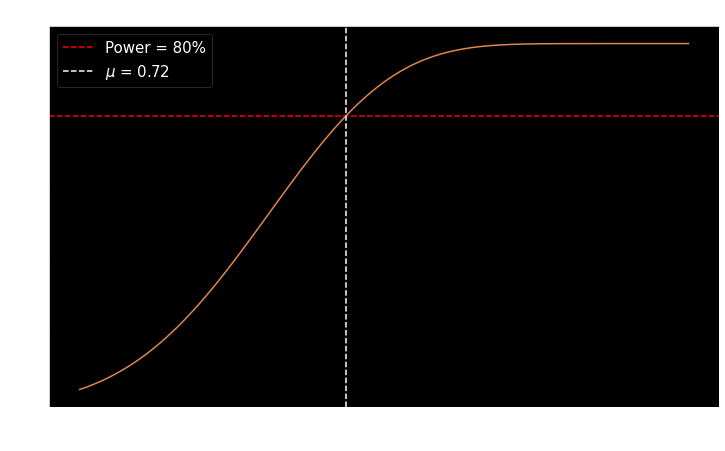

In [21]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Power for $N = 30$', fontsize=18)
pyplot.xlabel('$\mu$', fontsize=15)
pyplot.ylabel('Power', fontsize=15)

pyplot.plot(mu_grid, power)
pyplot.axhline(0.8, ls='--', color='red', label='Power = 80%')
# считаем минимальный эффект мощности в 80% 
min_mu = mu_grid[power >= 0.8].min()
pyplot.axvline(min_mu, ls='--', color='white', label='$\mu$ = {:.2f}'.format(min_mu))

pyplot.legend(fontsize=15)
pyplot.show()

В нашем эксперименте мы хорошо детектируем эффект, только если вероятность успеха в генеральной совокупности хотя бы $72\%$.

### MDE

Выше на графике мы увидели, что с хорошей мощностью больше $80\%$ мы можем заметить эффект в $22$ процентных пункта. Причём это можно посчитать даже до проведения эксперимента. В нашем случае такое увеличение успешности относительно $0.5$ вполне возможно, и с ним можно работать. Но когда аналитики проверяют изменения, зачастую ожидаемый эффект колеблется в районе одного, максимум двух процентов! Для подобных изменений не подойдёт выбранная постановка эксперимента, а значит и проводить его не имеет смысла.

Поэтому перед запуском экспериментов аналитики сообщают минимальную величину эффекта, которую можно задетектировать. Она так и называется, **минимальный детектируемый эффект**, сокращённо MDE (Minimal Detectable Effect). В нашем случае $MDE = +22$ п.п. 

Более формально, $MDE$ для гипотезы $\mathsf{H}_0: \mu = \mu_0$ &mdash; это минимальный эффект $\delta$, при котором критерий уровня значимости $\alpha$ для проверки этой гипотезы при истинном параметре $\mu = \mu_0 + \delta$ и размере выборки $N$ будет отвергать $\mathsf{H}_0$ с мощностью большей, чем $1 - \beta$.

Чаще всего берут $1 - \beta = 80\%$. Напишем функцию, которая будет вычислять MDE подбором.

In [24]:
def binom_test_mde_one_sided(N, mu0, alpha=0.05, min_power=0.8):
    '''Вычисляет MDE одностороннего критерия для проверки гипотезы mu = mu0 в задаче с доставкой
    
    Параметры:
        N (int) - размер выборки
        mu0 (float) - вероятность успеха в нулевой гипотезе
        alpha (float) - уровень значимости критерия
        min_power (float) - желаемая мощность
        
    Возвращает:
        float - MDE'''
    delta_grid = numpy.linspace(0, 1 - mu0, 500) 
    power = get_stat_power(N, mu0, mu0 + delta_grid, alpha=alpha)
    # выберем подходящие delta и вернем первую
    fit_delta = delta_grid[power >= min_power]
    return fit_delta[0]

Вызовем функцию для нашего случая

In [25]:
binom_test_mde_one_sided(30, 0.5)

0.21843687374749496

Результат совпадает с вычислениями по графику

Обычно MDE считают не просто так, а неразрывно с ним идёт вопрос об определении размера выборки.

**Определение размера выборки**

В нашей задаче мы нашли $30$ клиентов, не вычисляя изначально, сколько их понадобится. Но что если полученный MDE слишком велик и нужно сделать его меньше, поскольку ожидаемые изменения гораздо меньше? Тогда решается обратная задача, По требуемому MDE определить объём выборки. Если мы говорим, что хотим детектировать +10 п.п., то есть 60% успешных доставок, то потребуется найти 160 пробных клиентов, это видно из предыдущих графиков. Если 30 человек нам, например, искать месяц, такой тест может затянуться почти на полгода. Поэтому стоит подумать о том, чтобы выделить дополнительные ресурсы на поиск клиентов, например, привлечь маркетологов.


In [24]:
## попробую посчитать размер выборки
def binom_test_ssize_one_sided(N, mu0, alpha=0.05, min_power=0.8):
    '''Вычисляет необходимый размер выборки для одностороннего критерия для проверки гипотезы mu = mu0 в задаче с доставкой
    
    Параметры:
        N (int) - размер выборки
        mu0 (float) - вероятность успеха в нулевой гипотезе
        alpha (float) - уровень значимости критерия
        min_power (float) - желаемая мощность
        
    Возвращает:
        float - MDE'''
    delta_grid = numpy.linspace(0, 1 - mu0, 500) 
    power = get_stat_power(N, mu0, mu0 + delta_grid, alpha=alpha)
    # выберем подходящие delta и вернем первую
    fit_delta = delta_grid[power >= min_power]
    return fit_delta[0]

## Часть 3. Доверительные интервалы

В предыдущих частях мы научились проверять гипотезу $\mathsf{H}_0: \mu = 0.5$. В качестве ответа мы получаем лишь вердикт "отвергаем $\mathsf{H}_0$" или "не отвергаем $\mathsf{H}_0$". Однако в выборке содержится гораздо больше информации, и мы можем больше понять про параметр, чем сравнение с числом $0.5$.

Если гипотеза $\mathsf{H}_0$ не отвергается, это значит, что значение $\mu = 0.5$ допустимо для нашей выборки. Полученные значения можно объяснить значением $\mu = 0.5$. Но если у нас есть механизм проверки для любого $\mu$, мы можем для всех значений узнать, какие из них допустимы и получить множество возможных значений $\mu$. Такое множество называется доверительным интервалом.

*Доверительный интервал* уровня доверия $1 - \alpha$ &mdash; множество значений параметра $\mu_0$, для которых гипотеза $\mu = \mu_0$ не отвергается критерием уровня значимости $\alpha$.


Из определения следует, что разные критерии могут порождать разные доверительные интервалы. В этой части рассмотрим, какие интервалы порождаются двусторонним критерием. Для этого с шагом $0.001$ переберём значения $\mu \in [0, 1]$ и проверим гипотезы.

In [19]:
# Функция из прошлой лекции
def two_sided_criterion_nonsym(n, mu, alpha):
    '''Строит двусторонний критерий для несимметричной задачи с доставкой
    
    Параметры:
        n: количество доставок в эксперименте
        mu: вероятность успеха в нулевой гипотезе
        alpha: уровень значимости критерия
        
    Возвращает:
        C1, C2 для критерия S = {Q <= C1 или Q >= C2}
    '''
    binom_h0 = binom(n=n, p=mu)
    
    # аналогично одностороннему критерию
    c2 = binom_h0.ppf(1 - alpha/2) + 1
        
    # по выкладкам выше
    c1 = binom_h0.ppf(alpha/2) - 1
    
    return c1, c2

In [20]:
success_cnt = 19
mu_grid = numpy.arange(0, 1, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
    c1, c2 = two_sided_criterion_nonsym(30, mu_h0, alpha=0.05)
    if success_cnt > c1 and success_cnt < c2:
        mu_no_rejection.append(mu_h0)

print('95% confidence interval: {} -- {}'.format(min(mu_no_rejection), max(mu_no_rejection)))

95% confidence interval: 0.439 -- 0.8


Можно проверить, что допустимые значения образуют именно интервал. Впоследствии это можно будет увидеть по графикам.

Получив такой интервал, мы сразу можем сделать вывод, что гипотеза $\mathsf{H}_0: \mu = 0.5$ не отвергается, поскольку $0.5$ лежит в доверительном интервале. Но при этом сразу понятно, что $\mu \neq 0.4$ на уровне значимости $\alpha$.

Конечно же, в доверительном интервале лежит значение $\mu = \frac{19}{30}$, для которого $19$ успехов &mdash; это самый правдоподобный результат. При этом интервал несимметричен относительно точки $\frac{19}{30}$.

Посмотрим, как можно визуально найти границу интервала. Мы получили $19$ успехов. Для каждого $\mu_0$ статистика $Q$ имеет распределение $Binom(30, \mu_0)$. Будем рисовать это распределение и смотреть, попадает ли $19$ в критическую область.

In [18]:
mus_h0 = [0.2, 0.438, 0.439, 0.8, 0.81, 0.9]

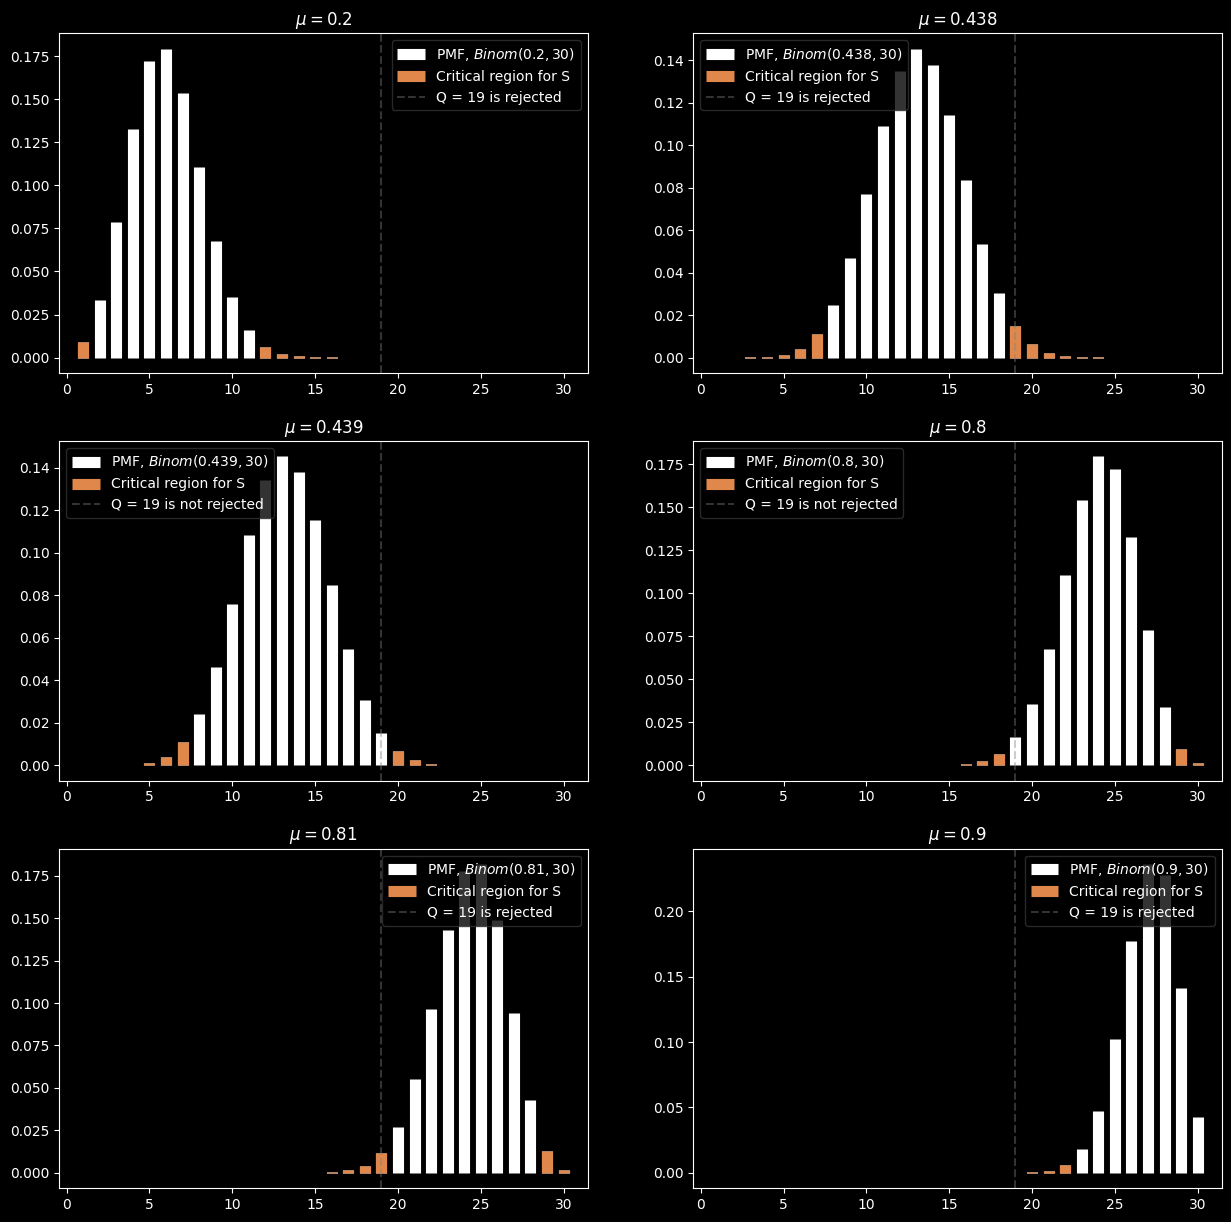

In [19]:
fig, axes = pyplot.subplots(3, 2, figsize=(15, 15))

for mu_h0, ax in zip(mus_h0, axes.flatten()):
    binom_h0 = binom(n=30, p=mu_h0)
    probs = binom_h0.pmf(x_grid)

    # строим вертикальные столбцы от 0 до вероятности
    ax.vlines(x_grid, 0, probs, linewidth=8.0, color='white', label=f'PMF, $Binom({mu_h0}, 30)$')
    # отдельно изобразим критическую области критерия
    c1, c2 = two_sided_criterion_nonsym(30, mu_h0, alpha=0.05)
    crit_reg = (x_grid <= c1) | (x_grid >= c2)
    ax.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=8.0, label='Critical region for S')

    is_rejection = success_cnt <= c1 or success_cnt >= c2
    ax.axvline(success_cnt, ls='--', label=f'Q = {success_cnt} ' + ('is rejected' if is_rejection else 'is not rejected'), color='gray', alpha=0.4)

    rejection_prob = probs[crit_reg].sum()
    ax.set_title(f'$\mu = {mu_h0}$', fontsize=12)
    ax.legend()

Видно, что с ростом $\mu_0$ гистограмма сдвигается вправо. И сначала $19$ попадает в правую критическую область. Потом, начиная с точки $0.439$, значение $19$ уже оказывается вне критической области, и только с $\mu_0 = 0.81$ начинает попадать в левую критическую область.

Таким образом, левая граница доверительного интервала &mdash; это первая точка, когда значение статистики перестало попадать в критическую область, а правая граница &mdash; последняя точка, когда значение не попадает в правую критическую область.

## Часть 4. Односторонние доверительные интервалы

В прошлой части мы использовали двусторонний критерий, и из него получился доверительный интервал. Но на прошлой лекции мы говорили, что двусторонний критерий нужен крайне редко. Контролировать ошибку False Positive нам нужно только для отклонений в сторону, полезную для бизнеса. В случае задачи с доставкой это получение *большей* конверсии в успех.

Попробуем воспользоваться односторонним критерием для построения доверительного интервала.

Возьмем критерий с прошлой лекции.

In [20]:
def make_binom_criterion(n, mu=0.5, alpha=0.05):
    '''Строит критерий для задачи с доставкой
    
    Параметры:
        n: количество доставок в эксперименте
        mu: вероятность успеха в нулевой гипотезе
        alpha: уровень значимости критерия
        
    Возвращает:
        C для критерия S = {Q >= C}
    '''
    binom_h0 = binom(n=n, p=mu)
    q = binom_h0.ppf(1 - alpha)
    return q + 1

In [21]:
success_cnt = 19
mu_grid = numpy.arange(0, 1.001, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
    crit_val = make_binom_criterion(n=30, mu=mu_h0, alpha=0.05)
    if success_cnt < crit_val:
        mu_no_rejection.append(mu_h0)

print('95% confidence interval: {} -- {}'.format(min(mu_no_rejection), max(mu_no_rejection)))

95% confidence interval: 0.467 -- 1.0


Когда мы использовали двусторонний интервал, мы получили левую границу $0.439 < 0.467$. Получается, что односторонний интервал с точки зрения левой границы даёт нам больше информации. При этом с точки зрения правой границы мы теряем информацию совсем. Она получается равна 1 просто потому что вероятность не может быть больше.

На самом деле обычно на правую границу не смотрят при анализе, когда мы ищем положительный эффект.

Предположим, мы получили не $19$ успехов, а $22$. Построим 2 вида интервалов.

In [22]:
success_cnt = 22
mu_grid = numpy.arange(0, 1, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
    c1, c2 = two_sided_criterion_nonsym(30, mu_h0, alpha=0.05)
    if success_cnt > c1 and success_cnt < c2:
        mu_no_rejection.append(mu_h0)

print('Two-sided 95% confidence interval: {:.3f} -- {:.3f}'.format(min(mu_no_rejection), max(mu_no_rejection)))

Two-sided 95% confidence interval: 0.542 -- 0.877


In [23]:
success_cnt = 22
mu_grid = numpy.arange(0, 1.001, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
    crit_val = make_binom_criterion(n=30, mu=mu_h0, alpha=0.05)
    if success_cnt < crit_val:
        mu_no_rejection.append(mu_h0)

print('One-sided 95% confidence interval: {:.3f} -- {:.3f}'.format(min(mu_no_rejection), max(mu_no_rejection)))

One-sided 95% confidence interval: 0.571 -- 1.000


По обоим доверительным интервалам мы делаем вывод, что конверсия значимо отличается от $50\%$. Но односторонный интервал даёт лучшую нижнюю оценку на вероятность успеха. Мы можем понять, что наша конверсия больше $57\%$. А информация из двустороннего интервала о том, что вероятность меньше $88\%$ не добавляет нам пользы.

Зачем же мы тогда вообще используем двусторонний интервал? Чтобы это понять, посмотрим, как выглядят визуально границы для одностороннего интервала.

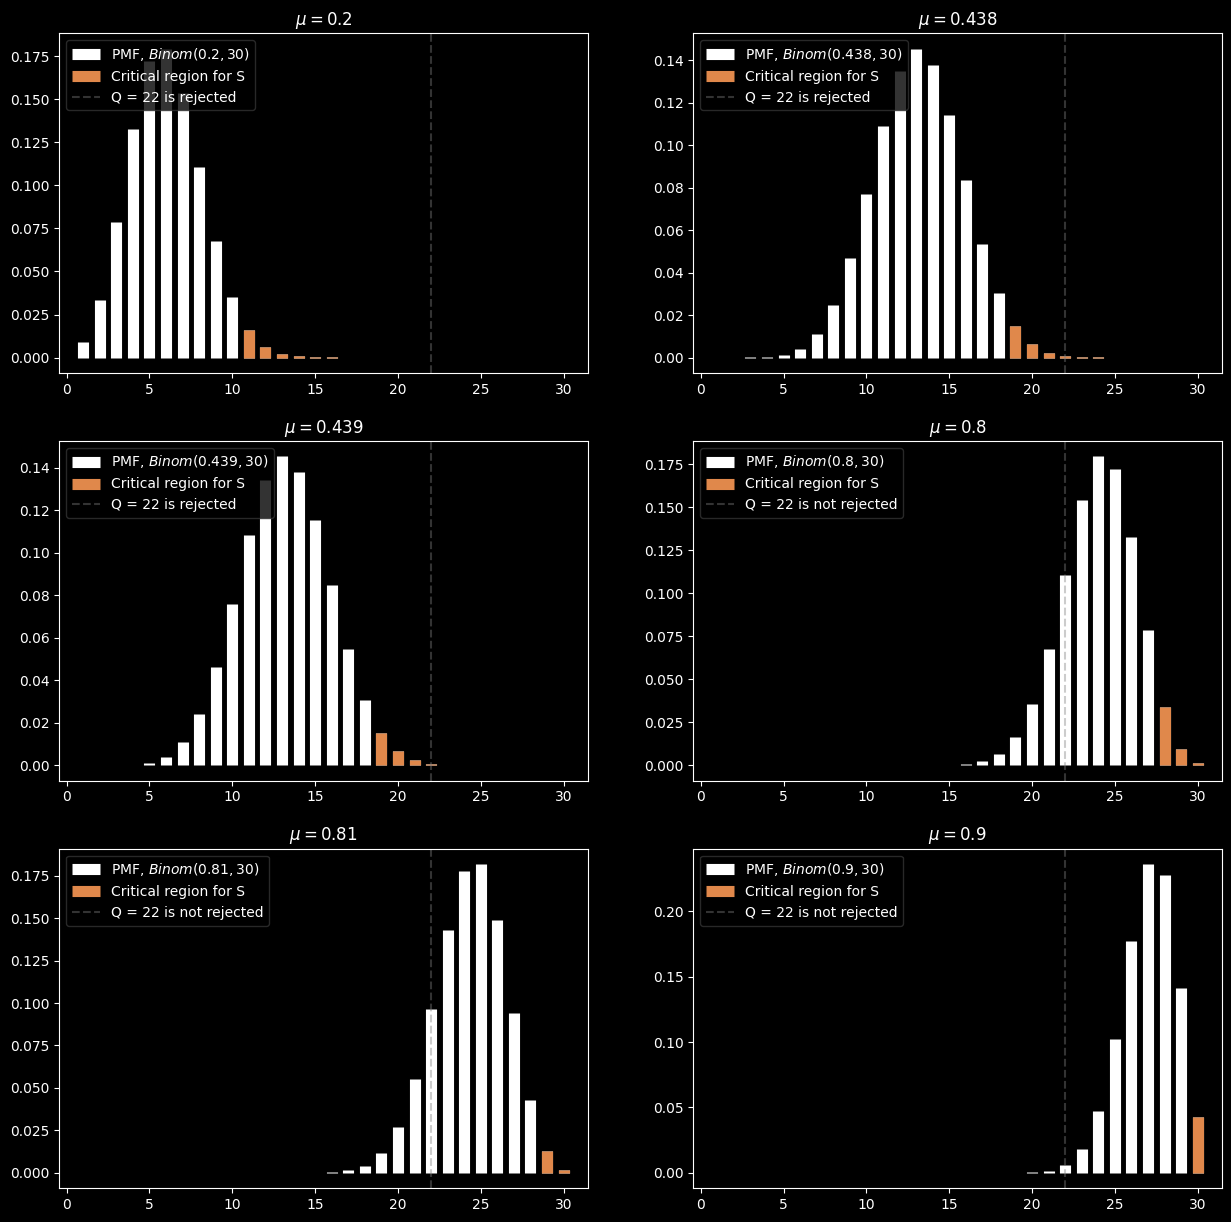

In [24]:
fig, axes = pyplot.subplots(3, 2, figsize=(15, 15))

for mu_h0, ax in zip(mus_h0, axes.flatten()):
    binom_h0 = binom(n=30, p=mu_h0)
    probs = binom_h0.pmf(x_grid)

    # строим вертикальные столбцы от 0 до вероятности
    ax.vlines(x_grid, 0, probs, linewidth=8.0, color='white', label=f'PMF, $Binom({mu_h0}, 30)$')
    # отдельно изобразим критическую области критерия
    c = make_binom_criterion(30, mu_h0, alpha=0.05)
    crit_reg = (x_grid >= c)
    ax.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=8.0, label='Critical region for S')

    is_rejection = success_cnt >= c
    ax.axvline(success_cnt, ls='--', label=f'Q = {success_cnt} ' + ('is rejected' if is_rejection else 'is not rejected'), color='gray', alpha=0.4)

    rejection_prob = probs[crit_reg].sum()
    ax.set_title(f'$\mu = {mu_h0}$', fontsize=12)
    ax.legend()

По сравнению с картинкой из предыдущей части мы видим, что правая критическая область стала больше из-за того, что там теперь находится не $2.5\%$, а $5\%$ по построению. При этом левой критической области просто не существует, поэтому при больших $\mu$ не происходит попадания $19$ в неё, а значит мы не отвергаем гипотезу.

Заметим, что если бы мы строили двусторонний интервал, но с вдвое большей $\alpha$, попадания в правую критическую область случались бы при тех же $\mu$, что и в одностороннем критерии. Поэтому зачастую для поиска односторонней границы строят двусторонний доверительный интервал с большей $\alpha$, игнорируя при этом правую границу. Это удобно, поскольку можно пользоваться только одной функцией для критерия.

Проверим, что получится при $\alpha = 0.1$.

In [25]:
success_cnt = 19
mu_grid = numpy.arange(0, 1, 0.001)
mu_no_rejection = []

for mu_h0 in mu_grid:
    c1, c2 = two_sided_criterion_nonsym(30, mu_h0, alpha=0.1)
    if success_cnt > c1 and success_cnt < c2:
        mu_no_rejection.append(mu_h0)

print('Two-sided 90% confidence interval: {:.3f} -- {:.3f}'.format(min(mu_no_rejection), max(mu_no_rejection)))

Two-sided 90% confidence interval: 0.467 -- 0.778


Видим, что получили такую же левую границу, как и в одностороннем интервале.

## Часть 5. Свойства доверительных интервалов

Вспомним определение доверительного интервала.

Пусть есть критерий $S = \{Q(\xi) \leqslant C\}$ уровня значимости $\alpha$ для проверки гипотезы $\mathsf{H}_0: \mu = \mu_0$, $Q$ &mdash; статистика критерия, а $q$ &mdash; её реализация на конкретной выборке $\xi = \xi_1, \dots, \xi_n$. Тогда **доверительным интервалом** называется множество таких $\mu_0$, на которых критерий $S$ не отвергает гипотезу $\mathsf{H}_0: \mu = \mu_0$.

Процедура подсчёта интервала в прошлой части &mdash; это долгий перебор значений с некоторым шагом. Но это всё ещё остаётся некоторой функцией от выборки, то есть *статистикой* и случайной величиной, причём её распределение зависит от статистики $Q$, а значит и от изначальной выборки, и от параметра $\mu$ в генеральной совокупности.

Обозначим границы интервала за $\mathcal{L}(Q), \mathcal{R}(Q)$ &mdash; статистики

**Свойство доверительного интервала**

Каким бы ни было истинное значение $\mu = \mu_0$, вероятность того, что оно находится между $\mathcal{L}(Q)$ и $\mathcal{R}(Q)$, не ниже, чем $1 - \alpha$. Значение $1 - \alpha$ называется **уровнем доверия** доверительного интервала.

$$ P(\mathcal{L}(Q) < \mu_0 < \mathcal{R}(Q)) \geqslant 1 - \alpha $$

Важно, что случайность здесь скрыта именно в $\mathcal{L}$ и $\mathcal{R}$, а не в $\mu_0$. Параметр $\mu_0$ неизвестен, но мы предполагаем его константным и не случайным.

Проверим справедливость этого свойства. Для этого зафиксируем $\mu_0$ и проведём множество экспериментов:

* Генерируем выборку из распределения с параметром $\mu_0$
* Вычисляем статистику $q$
* Считаем доверительный интервал для $\alpha = 0.05$

Проверяем, что доля случаев, когда параметр $\mu_0$ оказался внутри границ интервала, хотя бы $95\%$

In [26]:
def my_binomial_confint(n, alpha, q):
    '''Вычисляет доверительный интервал для выборки из распределения Бернулли
    
        n (int) - количество элементов в выборке
        alpha (float) - уровень значимости критерия
        q (float) - реализация статистики критерия
    '''
    mu_grid = numpy.arange(0, 1.001, 0.001)
    mu_no_rejection = []

    for mu_h0 in mu_grid:
        c1, c2 = two_sided_criterion_nonsym(30, mu_h0, alpha=0.05)
        if q > c1 and q < c2:
            mu_no_rejection.append(mu_h0)

    return min(mu_no_rejection), max(mu_no_rejection)

In [27]:
numpy.random.seed(202312)

In [30]:
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 30
latent_mu = 0.5  # "истинное" значение параметра
binom_true = binom(n=SAMPLE_SIZE, p=latent_mu)  # "истинное" распрееление

confint_fail_cases = 0

for i in range(N_EXPERIMENTS):
    q = binom_true.rvs()  # генерируем сразу сумму элементов
    L, R = my_binomial_confint(n=SAMPLE_SIZE, alpha=0.05, q=q)
    if L < latent_mu < R:
        pass # всё хорошо
    else:
        confint_fail_cases += 1

print(1 - confint_fail_cases / N_EXPERIMENTS)

0.976


Отметим, что этот код работал больше 5 минут. Это из-за того, что при каждом эксперименте требуется построить доверительный интервал, а значит проверить 1000 возможных параметров $\mu_0$.

Видим, что свойство выполнилось. Мы ожидали хотя бы $95\%$ попаданий, получили даже $97.5\%$. На самом деле это сильно больше, чем мы ожидали. Это происходит из-за дискретности распределения. По той же причине при поиске критической области мы не могли выбрать столбцы с суммарной высотой ровно $\alpha$.

**Доказательство свойства**

При формулировке свойства мы предполагаем, что есть некоторая $\mu_0$ &mdash; вероятность успеха в генеральной совокупности. Когда мы проводим искусственный эксперимент, мы фиксируем её и можем считать истинной $\mu$.

Каждый раз мы генерируем $Q \sim Binom(\mu_0, 30)$ и проверяем, попала ли $\mu_0$ в доверительный интервал. Нарисуем распределение статистики $Q$, которое уже нам знакомо. Нарисуем и область вероятности $\leqslant \alpha$, как мы делали это раньше.

In [28]:
mu0 = 0.5
binom_mu0 = binom(n=30, p=mu0)  # раньше это было mu_h0, остальное так же
probs = binom_mu0.pmf(x_grid)

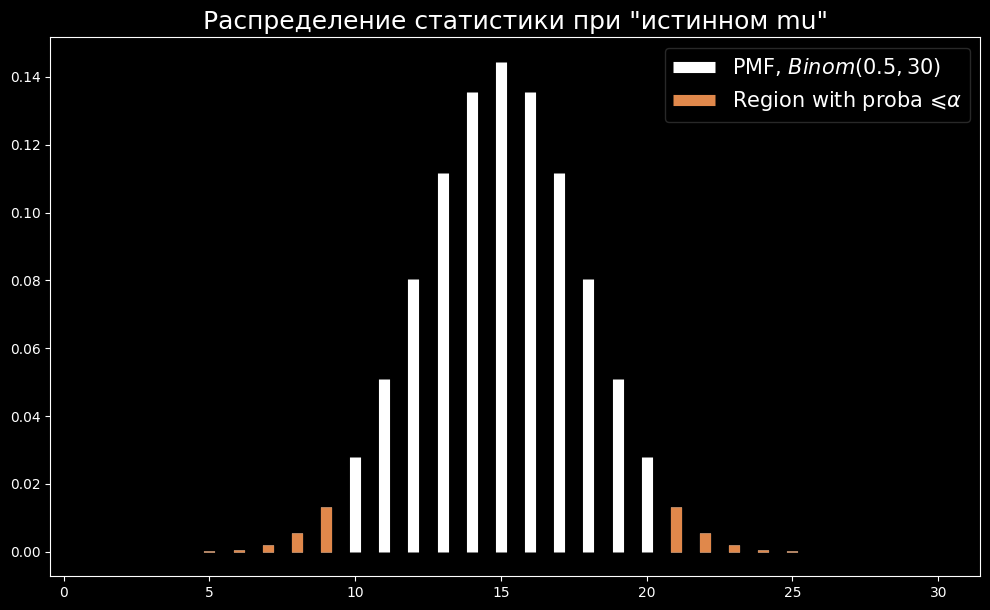

In [29]:
pyplot.figure(figsize=(12, 7))

pyplot.title('Распределение статистики при "истинном mu"', fontsize=18)

pyplot.vlines(x_grid, 0, probs, linewidth=8.0, color='white', label=f'PMF, $Binom({mu0}, 30)$')
c1, c2 = two_sided_criterion_nonsym(30, mu0, alpha=0.05)
crit_reg = (x_grid >= c2) | (x_grid <= c1)
pyplot.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=8.0, label='Region with proba $\leqslant \\alpha$')
pyplot.legend(fontsize=15)
pyplot.show()

Пусть реализовалось значение статистики $q$. По такой выборке можно построить доверительный интервал на $\mu$. Он будет как-то расположен, но сейчас нас интересует, попадёт ли в него $\mu_0$. По определению попадание в интервал произойдёт $\Leftrightarrow$ не отвергается гипотеза $\mathsf{H}_0:\ \mu = \mu_0$. Но тогда при справедливости $\mathsf{H}_0$ статистика имеет то распределение, что и на рисунке. И гипотеза отвергается только при попадании в рыжую критическую область, а это случается с вероятностью $\leqslant \alpha$.

Значит с вероятностью хотя бы $1 - \alpha$ $\mu_0$ будет находиться в доверительном интервале.

Часто так и вводят определение доверительного интервала. Для выборки $\xi_1, \dots, \xi_n$ &mdash; это такая пара статистик $\mathcal{L}(\xi)$ и $\mathcal{R}(\xi)$, что каким бы ни было $\mu_0$,

$$P(L(\xi) < \mu_0 < R(\xi)) \geqslant 1 - \alpha$$

Снова обращаем внимание, что случайность здесь скрыта не в параметре $\mu_0$, а в статистиках от выборки.

**Приближённое построение интервала**

Рассмотренный сейчас алгоритм построение доверительного интервала работает слишком долго. В Python есть функции, которые позволяют быстрее рассчитать интервал. Например, можно воспользоваться методом Уилсона и функцией `proportion_confint`

In [30]:
from statsmodels.stats.proportion import proportion_confint

Повторим эксперименты с новым типом доверительного интервала, тут можем позволить больше реализаций выборки, покольку интервал считается недолго.

In [47]:
numpy.random.seed(20231212)

In [48]:
N_EXPERIMENTS = 1000
SAMPLE_SIZE = 30
latent_mu = 0.5  # "истинное" значение параметра
binom_true = binom(n=SAMPLE_SIZE, p=latent_mu)  # "истинное" распрееление

confint_fail_cases = 0

for i in range(N_EXPERIMENTS):
    q = binom_true.rvs()  
    L, R = proportion_confint(
        count=q,  # количество успехов
        nobs=SAMPLE_SIZE,  # размер выборки
        alpha=0.05,
        method='wilson'
    )
    if L < latent_mu < R:
        pass # всё хорошо
    else:
        confint_fail_cases += 1

print(1 - confint_fail_cases / N_EXPERIMENTS)

0.943


 Заметим, что наше $\mu$ нашлось в доверительном интервале меньше, чем в $95\%$ случаев. Это происходит из-за того, что быстрые методы работают приближённо, оценивая распределение статистики при увеличении размера выборки. Чем размер выборки больше, тем ближе будет интервал к $95\%$-ному.

 Зависимость доли успешных попаданий $\mu$ в доверительный интервал от размера выборки изобразим на графике.

In [49]:
n_grid = numpy.arange(1, 1000, 25).tolist()
interval_success_rate = []

for n in n_grid:
    confint_fail_cases = 0
    for i in range(N_EXPERIMENTS):
        binom_true = binom(n=n, p=latent_mu)
        q = binom_true.rvs()  
        L, R = proportion_confint(
            count=q,  # количество успехов
            nobs=n,  # размер выборки
            alpha=0.05,
            method='wilson'
        )
        if L < latent_mu < R:
            pass # всё хорошо
        else:
            confint_fail_cases += 1
    interval_success_rate.append(1 - confint_fail_cases / N_EXPERIMENTS)

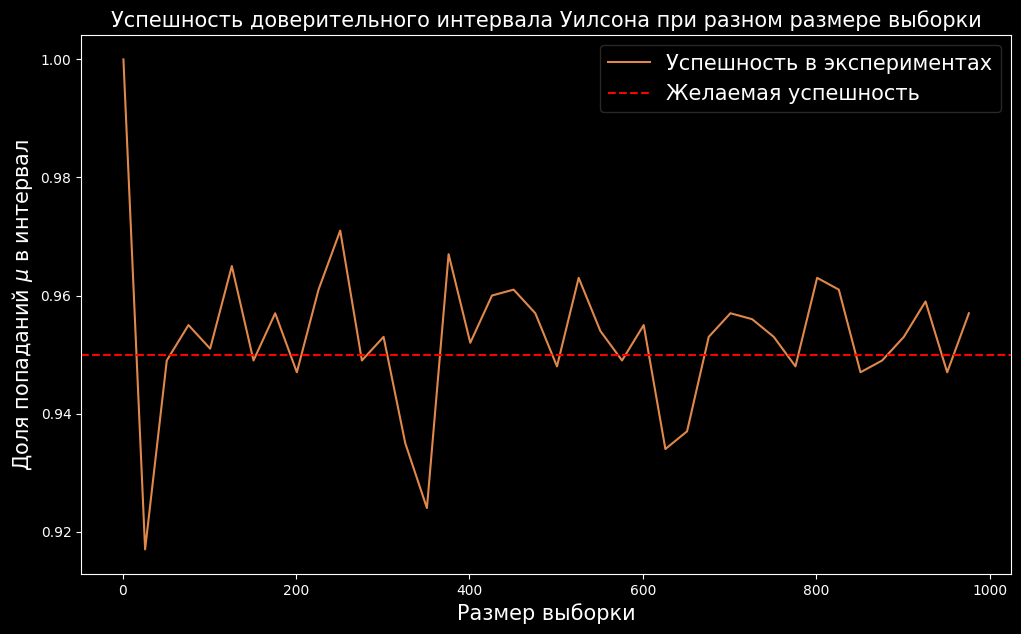

In [50]:
pyplot.figure(figsize=(12, 7))
pyplot.title('Успешность доверительного интервала Уилсона при разном размере выборки', fontsize=15)
pyplot.xlabel('Размер выборки', fontsize=15)
pyplot.ylabel('Доля попаданий $\mu$ в интервал', fontsize=15)

pyplot.plot(n_grid, interval_success_rate, label='Успешность в экспериментах')
pyplot.axhline(0.95, ls='--', label='Желаемая успешность', color='red')

pyplot.legend(fontsize=15)
pyplot.show()

Видно, что на любом размере выборки при использовании интервала Уилсона можно получить меньше $95\%$ попаданий, но чем больше размер выборки, тем меньше график отклоняется от $95\%$.

### Итог

Мы рассмотрели понятие мощности и поняли, что не все критерии уровня значимости $\alpha$ могут быть применимы на практике. Мы определили MDE и способ определения размера выборки, которые помогают правильно запланировать эксперимент и затраты на него.

Далее мы рассмотрели доверительные интервалы, которые помогают больше узнать о параметре, чем простой вердикт критерия.